In [163]:
import gspread
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import pandas as pd
import pandas as pd 
from collections import Counter
import calmap
import calplot
import numpy as np

# https://builtin.com/data-science/github-contribution-plot

In [188]:
# creating gspread.client.Client object to access the sheet 
gc = gspread.service_account(filename='sheet_auth.json')
type(gc)

gspread.client.Client

In [189]:
# opening google sheets 
wks = gc.open('reading list').sheet1
wks

<Worksheet 'drug discovery' id:0>

In [190]:
raw_col = wks.col_values(1)
df = pd.DataFrame(raw_col[1:], columns=[raw_col[0]])

counts = df['read_date'].value_counts()
df = df.drop_duplicates()
df['per_day'] = df['read_date'].map(counts)
df

,read_date,per_day
0,2/5/24,1
1,2/6/24,1
2,2/16/24,1
3,2/12/24,2
5,2/17/24,2
7,2/22/24,4
8,2/23/24,1
12,2/27/24,3
13,2/26/24,1
16,2/29/24,7


In [155]:
# def split_date(date_string):
#     ''' splits the month, day and year given a date as a string 'mm/dd/yy' '''
#     date_object = datetime.strptime(date_string, "%m/%d/%y")
#     day_of_week = date_object.strftime("%A")
#     month = date_object.strftime('%B')
#     return month, date_object.day, day_of_week, date_object.year


# df[['month', 'date', 'day', 'year']] = df['read_date'].apply(lambda x: pd.Series(split_date(x)))

# df

In [109]:
# df_new = df[['month', 'date', 'day', 'per_day', 'year']]
# df_new

In [191]:

df['read_date'] = pd.to_datetime(df['read_date'], format='%m/%d/%y')
df

,read_date,per_day
0,2024-02-05,1
1,2024-02-06,1
2,2024-02-16,1
3,2024-02-12,2
5,2024-02-17,2
7,2024-02-22,4
8,2024-02-23,1
12,2024-02-27,3
13,2024-02-26,1
16,2024-02-29,7


In [192]:
df.set_index('read_date', inplace=True)
df

,per_day
read_date,
2024-02-05,1
2024-02-06,1
2024-02-16,1
2024-02-12,2
2024-02-17,2
2024-02-22,4
2024-02-23,1
2024-02-27,3
2024-02-26,1


<Figure size 1000x600 with 0 Axes>

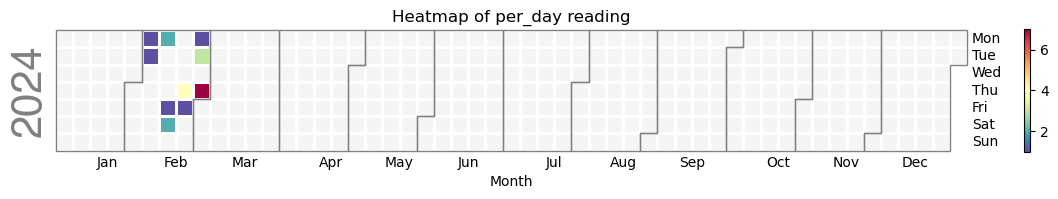

In [212]:
plt.figure(figsize=(10, 6))
calplot.calplot(data=df['per_day'], cmap='Spectral_r')

plt.title('Heatmap of per_day reading')
plt.xlabel('Month')
plt.ylabel('2024')
plt.show()

In [201]:
df['per_day']

read_date
2024-02-05    1
2024-02-06    1
2024-02-16    1
2024-02-12    2
2024-02-17    2
2024-02-22    4
2024-02-23    1
2024-02-27    3
2024-02-26    1
2024-02-29    7
Name: per_day, dtype: int64